# Red convolucional
_Por: Alfredo Villegas_

En el siguiente trabajo se implementará un modelo de clasificación de imágenes simple utilizando una CNN en un conjunto de datos a escoger.

In [1]:
import tensorflow as tf
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt


In [6]:
train_images = np.load('kminst/kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kminst/kmnist-train-labels.npz')['arr_0']
test_images = np.load('kminst/kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kminst/kmnist-test-labels.npz')['arr_0']


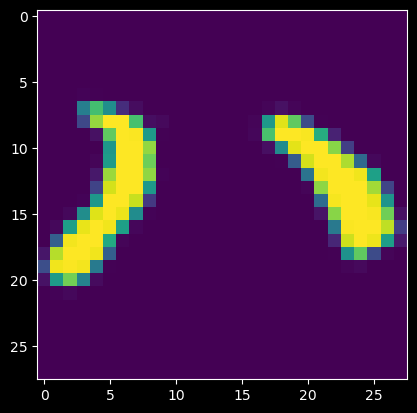

In [26]:
plt.imshow(train_images[13])


In [15]:
train_images = train_images.astype('float32') / 255 
test_images =  test_images.astype('float32') / 255 

train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

In [29]:
train_images.shape

(60000, 28, 28, 1)

In [16]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size= 2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [18]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 13s 4ms/step - loss: 0.4843 - accuracy: 0.8472
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2145 - accuracy: 0.9341
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1647 - accuracy: 0.9504
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1490 - accuracy: 0.9551
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1326 - accuracy: 0.9603
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1279 - accuracy: 0.9634
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1257 - accuracy: 0.9633
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1253 - accuracy: 0.9635
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1228 - accuracy: 0.9639
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1189 - accuracy: 0.966

In [19]:
model.evaluate(test_images, test_labels, verbose=0)

[0.23568671941757202, 0.9365000128746033]